# Домашнее задание 2. Нейронные сети
## Фамилия Имя Группа

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация библиотек

In [4]:
import pandas as pd
import numpy as np

import torch
from sklearn.metrics import f1_score, classification_report, mean_squared_error
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split, Dataset
from sklearn.preprocessing import StandardScaler
from torch.utils.data.sampler import SubsetRandomSampler
from tqdm import tqdm
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd "/content/drive/My Drive/Python/Quasar17"

/content/drive/My Drive/Python/Quasar17


# 1. Искусственная неронная сеть для решения задачи регрессии (9 баллов)

## 1.1 Загрузите данные, поделить на train и test
## 1.2 По необходимости проведите преодбработку/нормализацию данных



 Воспользуемся алгоритмом предобработки данных из предыдущего задания

In [145]:
df = pd.read_csv('Car details v3.csv')

In [146]:
# уберем пропуски и неинформативный столбец name
df.dropna(inplace=True)
# добавим возраст авто
df['age'] = 2022 - df['year']
df.drop(['year'],axis = 1,inplace = True)

# преобразуем часть признаков в числовые и seats в категориальный
df['mileage'] = df['mileage'].str.strip('kmpl').str.strip('km/kg')
df['engine'] = df['engine'].str.strip('CC')
df['max_power'] = df['max_power'].str.strip('bhp').str.strip()
df['mileage'] = pd.to_numeric(df['mileage'])
df['engine'] = pd.to_numeric(df['engine'])
df['max_power'] = pd.to_numeric(df['max_power'])
df['seats'] = df['seats'].astype(str)

In [359]:
# Преобразуем признаки и уберем часть выбросов
df_model = df.copy()

# преобразуем name в brand авто
df_model.drop(['name'],axis=1,inplace=True)

# уберем выбросы в цене
df_model = df_model[df_model['selling_price'] < 1200000]
#df_model['selling_price'] = np.log(df_model['selling_price'])

# уберем выбросы в engine
df_model = df_model[df_model['engine'] < 2000]

# Уберем выбросы в km_driven
df_model = df_model[df_model['km_driven'] < 180000]

# уберем редковстречающиеся значений fuel 
df_model = df_model[~df_model['fuel'].isin(['CNG','LPG'])]

# уберем выбросы в mileage
df_model = df_model[(df_model['mileage'] > 5) & (df_model['mileage'] < 35)]

# уберем выбросы в max_power
df_model = df_model[df_model['max_power'] < 130]
df_model = df_model[df_model['age'] < 20]

df_model.drop(['torque'],axis=1,inplace=True)



In [361]:
categorical_cols = df_model.select_dtypes('object').columns.to_list()
for col in categorical_cols:
        df_model[col] = df_model[col].astype('category').cat.codes

In [362]:
X, y = df_model.drop(['selling_price'], axis = 1), df_model['selling_price']
scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [363]:
X=(X-X.mean())/X.std()

In [364]:
# подготовка данных
def prepare_data(X,y, batch_size):
    train_size = int(0.8 * X.shape[0])
    val_size = int(X.shape[0] - train_size)
    X = X.to_numpy()
    y = y.to_numpy()

    X_tensor = torch.Tensor(X)
    y_tensor = torch.Tensor(y)

    dataset = TensorDataset(X_tensor, y_tensor)
    train_ds, val_ds = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_ds, batch_size=batch_size,
                                              shuffle=True)

    val_loader = DataLoader(val_ds, batch_size=batch_size,
                                             shuffle=False)
    return train_loader, val_loader

In [365]:
# обучение
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    train_losses = []
    train_acc = []
    val_losses = []
    valid_accuracies = []
    for epoch in range(epochs):
        model.train()
        loss_sum = 0
        squared_error = 0
        n = 0
        for xb, yb in (train_dl):
            xb, yb = xb.to(device), yb.to(device)
            probs = model(xb)
            loss = loss_func(model(xb), yb)
            loss_sum += loss.item()
            _, preds = torch.max(probs, axis=-1)

            squared_error += torch.pow(preds - yb, 2).sum(dim=0).item()
            n += yb.shape[0]
            
            loss.backward()
            opt.step()
            opt.zero_grad()
        train_acc.append(pow(squared_error / n,0.5))
        train_losses.append(loss_sum / len(train_dl))

        model.eval()
        loss_sum = 0
        squared_error = 0
        n = 0
        with torch.no_grad():
            for xb, yb in valid_dl:
                xb, yb = xb.to(device), yb.to(device)
                probs = model(xb)
                loss_sum += loss_func(probs, yb).item()
                _, preds = torch.max(probs, axis=-1)
                squared_error += torch.pow(preds - yb, 2).sum(dim=0).item()
                n += yb.shape[0]
                
        val_losses.append(loss_sum / len(valid_dl))
        valid_accuracies.append(pow(squared_error / n,0.5))
        
    return train_losses, train_acc,  val_losses, valid_accuracies

In [366]:
# визуализация
def plot_trainig(train_losses, train_acc,  valid_losses, valid_accuracies):
    plt.figure(figsize=(12, 9))
    ax1 = plt.subplot(221)
    plt.xlabel('epoch')
    ax1.plot(train_losses, label='train_loss')
    ax1.plot(valid_losses, label='valid_loss')
    ax1.legend()
    
    ax2 = plt.subplot(222)
    plt.xlabel('epoch')
    ax2.plot(train_acc, label='train accuracy')
    ax2.plot(valid_accuracies, label='valid accuracy')
    ax2.legend()

## 1.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=линейная регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое функцию активации можно не использовать.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [367]:
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        self.fc1 = nn.Linear(10, 1) 
    def forward(self, x):
        x = self.fc1(x)
        return x

In [368]:
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        self.fc1 = nn.Linear(10, 30)  
        self.fc2 = nn.Linear(30, 1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [369]:
class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()
        self.fc1 = nn.Linear(10, 30)  
        self.fc2 = nn.Linear(30, 40)
        self.fc3 = nn.Linear(40, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [370]:
class Model_4(nn.Module):
    def __init__(self):
        super(Model_4, self).__init__()
        self.fc1 = nn.Linear(10, 16)  
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [32]:
device = torch.device('cuda:0') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda', index=0)

In [33]:
device = torch.device('cpu')

In [34]:
model_1 = Model_1().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01)
info_1 = fit(50, model_1, criterion, optimizer, *prepare_data(X,y,128))

NameError: ignored

In [373]:
model_2 = Model_2().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.01)
info_2 = fit(50, model_2, criterion, optimizer, *prepare_data(X,y,128))

In [374]:
model_3 = Model_3().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.01)
info_3 = fit(50, model_3, criterion, optimizer, *prepare_data(X,y,128))

In [375]:
model_4 = Model_4().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.01)
info_4 = fit(50, model_4, criterion, optimizer, *prepare_data(X,y,128))

In [376]:
# визуализация
def plot_resuls(models):
    for model in models.keys():
      
      plt.figure(figsize=(12, 7))
      ax1 = plt.subplot(221)
      plt.xlabel('epoch')
      ax1.plot(models[model][0], label=f'train_loss {model}')
      ax1.plot(models[model][2], label=f'valid_loss {model}')
      ax1.legend()
      
      ax2 = plt.subplot(222)
      plt.xlabel('epoch')
      ax2.plot(models[model][1], label=f'train accuracy {model}')
      ax2.plot(models[model][3], label=f'valid accuracy {model}')
      ax2.legend()

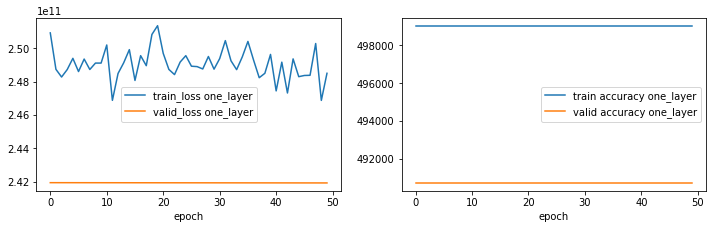

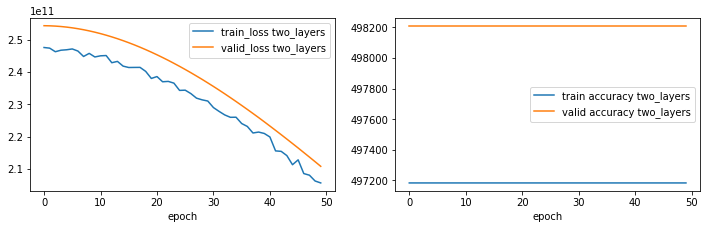

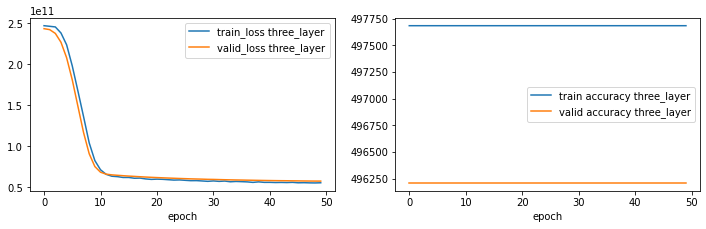

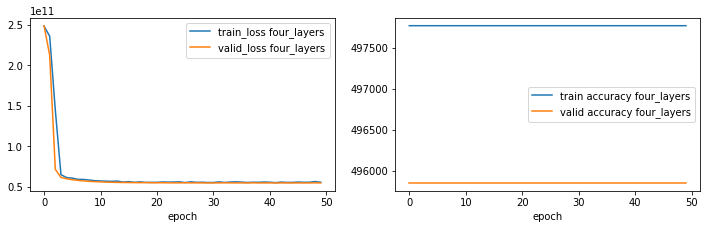

In [377]:
models = {'one_layer' : info_1, 'two_layers' : info_2, 'three_layer' : info_3, 'four_layers' : info_4}
plot_resuls(models)

## 1.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации: sigmoid, tanh, ReLU, ELU. 

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

In [378]:
class Model_sigmoid(nn.Module):
    def __init__(self):
        super(Model_sigmoid, self).__init__()
        self.fc1 = nn.Linear(10, 30)  
        self.fc2 = nn.Linear(30, 40)
        self.fc3 = nn.Linear(40, 50)
        self.fc4 = nn.Linear(50, 1)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x

In [379]:
class Model_tanh(nn.Module):
    def __init__(self):
        super(Model_tanh, self).__init__()
        self.fc1 = nn.Linear(10, 30)  
        self.fc2 = nn.Linear(30, 40)
        self.fc3 = nn.Linear(40, 50)
        self.fc4 = nn.Linear(50, 1)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = F.tanh(self.fc3(x))
        x = self.fc4(x)
        return x

In [380]:
class Model_relu(nn.Module):
    def __init__(self):
        super(Model_relu, self).__init__()
        self.fc1 = nn.Linear(10, 30)  
        self.fc2 = nn.Linear(30, 40)
        self.fc3 = nn.Linear(40, 50)
        self.fc4 = nn.Linear(50, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [381]:
class Model_elu(nn.Module):
    def __init__(self):
        super(Model_elu, self).__init__()
        self.fc1 = nn.Linear(10, 30)  
        self.fc2 = nn.Linear(30, 40)
        self.fc3 = nn.Linear(40, 50)
        self.fc4 = nn.Linear(50, 1)

    def forward(self, x):
        x = F.elu(self.fc1(x))
        x = F.elu(self.fc2(x))
        x = F.elu(self.fc3(x))
        x = self.fc4(x)
        return x

In [382]:
model_sigm = Model_sigmoid().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_sigm.parameters(), lr=0.01)
info_sigmoid = fit(50, model_sigm, criterion, optimizer, *prepare_data(X,y,128))

In [383]:
model_tanh = Model_tanh().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_tanh.parameters(), lr=0.01)
info_tanh = fit(50, model_tanh, criterion, optimizer, *prepare_data(X,y,128))

In [384]:
model_relu = Model_relu().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_relu.parameters(), lr=0.01)
info_relu = fit(50, model_relu, criterion, optimizer, *prepare_data(X,y,128))

In [385]:
model_elu = Model_elu().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_elu.parameters(), lr=0.01)
info_elu = fit(50, model_elu, criterion, optimizer, *prepare_data(X,y,128))

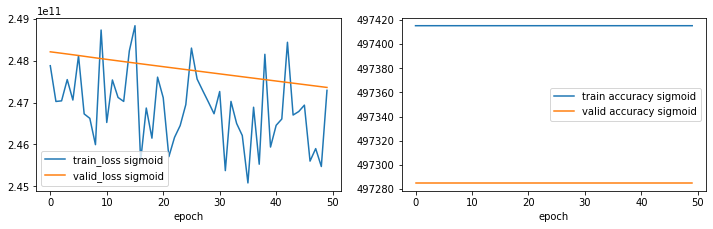

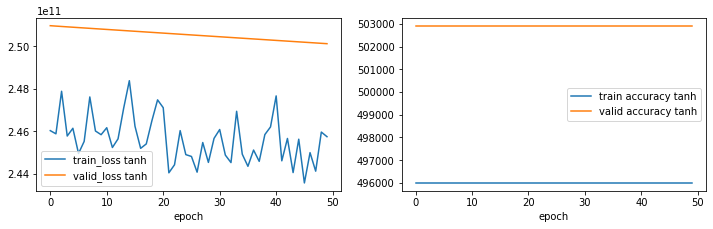

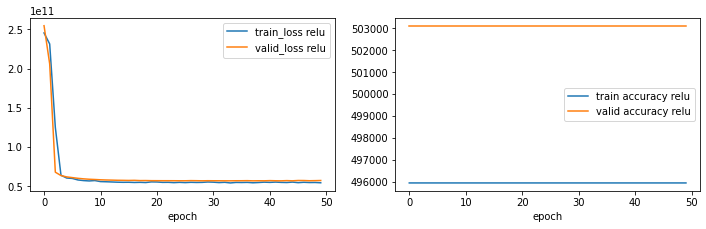

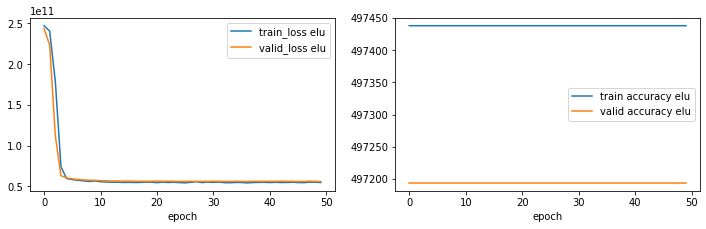

In [386]:
models = {'sigmoid' : info_sigmoid, 'tanh' : info_tanh, 'relu' : info_relu, 'elu' : info_elu}
plot_resuls(models)

## 1.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

In [387]:
model_relu = Model_relu().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_relu.parameters(), lr=0.01)
info_adam = fit(50, model_relu, criterion, optimizer, *prepare_data(X,y,128))

In [388]:
model_relu = Model_relu().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model_relu.parameters(), lr=0.01)
info_sgd = fit(50, model_relu, criterion, optimizer, *prepare_data(X,y,128))

In [389]:
model_relu = Model_relu().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model_relu.parameters(), lr=0.01, momentum = 0.5)
info_sgd_momentum = fit(50, model_relu, criterion, optimizer, *prepare_data(X,y,128))

In [390]:
model_relu = Model_relu().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(model_relu.parameters(), lr=0.01)
info_RMSprop = fit(50, model_relu, criterion, optimizer, *prepare_data(X,y,128))

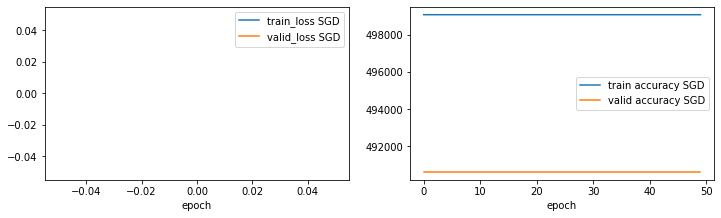

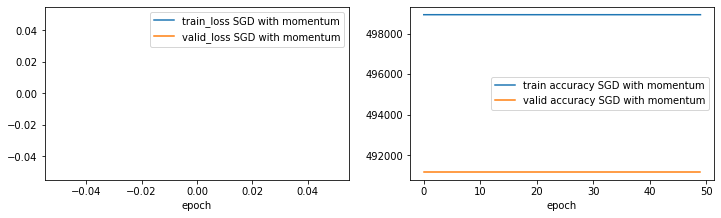

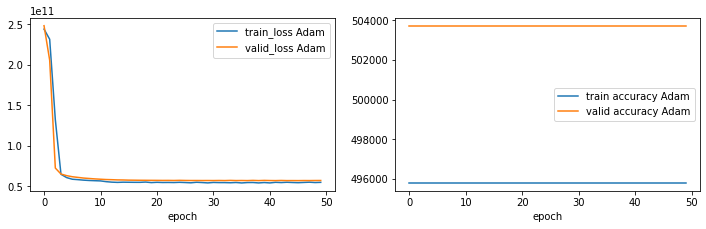

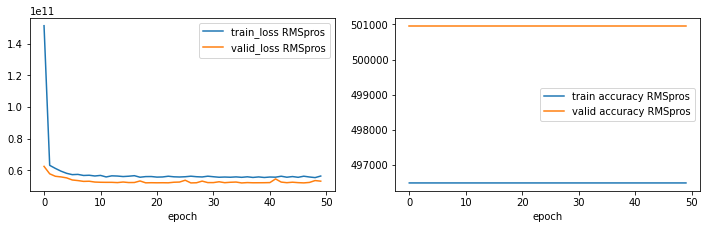

In [391]:
models = {'SGD' : info_sgd, 'SGD with momentum' : info_sgd_momentum, 'Adam' : info_adam, 'RMSpros' : info_RMSprop}
plot_resuls(models)

## 1.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

In [392]:
class Model_dropout_02(nn.Module):
    def __init__(self):
        super(Model_dropout_02, self).__init__()
        self.fc1 = nn.Linear(10, 30)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(30, 40)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(40, 50)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(F.relu(self.fc2(x)))
        x = self.dropout3(F.relu(self.fc3(x)))
        x = self.fc4(x)
        return x

In [393]:
class Model_batch(nn.Module):
    def __init__(self):
        super(Model_batch, self).__init__()
        self.fc1 = nn.Linear(10, 30)
        self.bn1 = nn.BatchNorm1d(30)
        self.fc2 = nn.Linear(30, 40)
        self.bn2 = nn.BatchNorm1d(40)
        self.fc3 = nn.Linear(40, 50)
        self.bn3 = nn.BatchNorm1d(50)
        self.fc4 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.bn1(F.relu(self.fc1(x)))
        x = self.bn2(F.relu(self.fc2(x)))
        x = self.bn3(F.relu(self.fc3(x)))
        x = self.fc4(x)
        return x

In [394]:
class Model_dropout_05(nn.Module):
    def __init__(self):
        super(Model_dropout_05, self).__init__()
        self.fc1 = nn.Linear(10, 30)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(30, 40)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(40, 50)
        self.dropout3 = nn.Dropout(p=0.5)
        self.fc4 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(F.relu(self.fc2(x)))
        x = self.dropout3(F.relu(self.fc3(x)))
        x = self.fc4(x)
        return x

In [395]:
class Model_batch_dropout_05(nn.Module):
    def __init__(self):
        super(Model_batch_dropout_05, self).__init__()
        self.fc1 = nn.Linear(10, 30)
        self.bn1 = nn.BatchNorm1d(30)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(30, 40)
        self.bn2 = nn.BatchNorm1d(40)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(40, 50)
        self.bn3 = nn.BatchNorm1d(50)
        self.dropout3 = nn.Dropout(p=0.5)
        self.fc4 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.dropout1(self.bn1(F.relu(self.fc1(x))))
        x = self.dropout2(self.bn2(F.relu(self.fc2(x))))
        x = self.dropout3(self.bn3(F.relu(self.fc3(x))))
        x = self.fc4(x)
        return x

In [396]:
class Model_batch_dropout_02(nn.Module):
    def __init__(self):
        super(Model_batch_dropout_02, self).__init__()
        self.fc1 = nn.Linear(10, 30)
        self.bn1 = nn.BatchNorm1d(30)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(30, 40)
        self.bn2 = nn.BatchNorm1d(40)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(40, 50)
        self.bn3 = nn.BatchNorm1d(50)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.dropout1(self.bn1(F.relu(self.fc1(x))))
        x = self.dropout2(self.bn2(F.relu(self.fc2(x))))
        x = self.dropout3(self.bn3(F.relu(self.fc3(x))))
        x = self.fc4(x)
        return x

In [397]:
model_dropout_02 = Model_dropout_02().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_dropout_02.parameters(), lr=0.01)
info_dropout_02 = fit(50, model_dropout_02, criterion, optimizer, *prepare_data(X,y,128))

In [398]:
model_dropout_05 = Model_dropout_05().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_dropout_05.parameters(), lr=0.01)
info_dropout_05 = fit(50, model_dropout_05, criterion, optimizer, *prepare_data(X,y,128))

In [399]:
model_batch = Model_batch().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_batch.parameters(), lr=0.01)
info_batch = fit(50, model_batch, criterion, optimizer, *prepare_data(X,y,128))

In [400]:
model_batch_dropout_05 = Model_batch_dropout_05().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_batch_dropout_05.parameters(), lr=0.01)
info_batch_dropout_05 = fit(50, model_batch_dropout_05, criterion, optimizer, *prepare_data(X,y,128))

In [409]:
model_batch_dropout_02 = Model_batch_dropout_02().to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model_batch_dropout_02.parameters(), lr=0.01)
info_batch_dropout_02 = fit(50, model_batch_dropout_02, criterion, optimizer, *prepare_data(X,y,128))

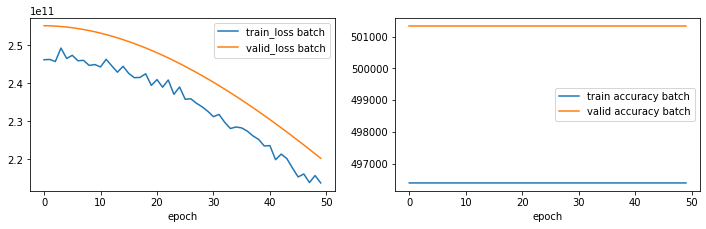

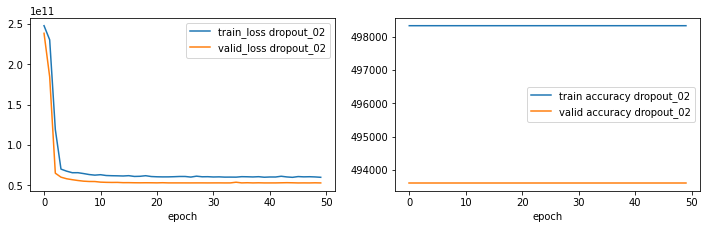

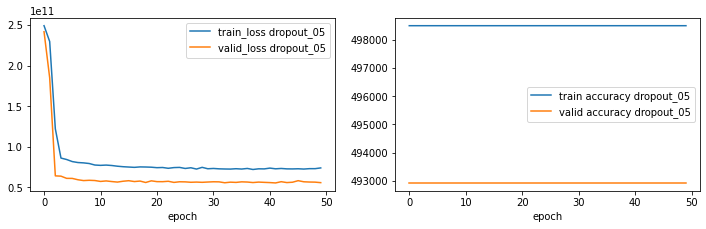

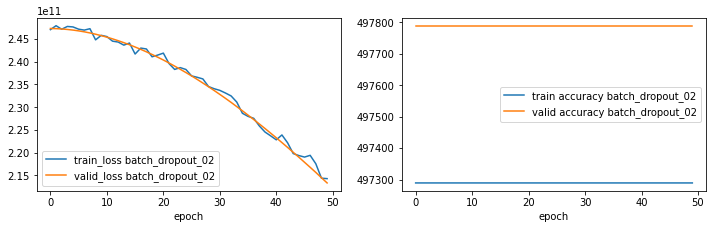

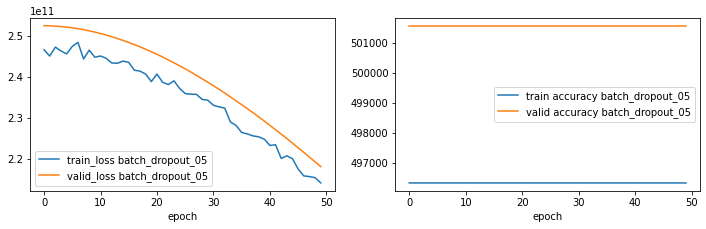

In [402]:
models = {'batch' : info_batch, 'dropout_02' : info_dropout_02, 'dropout_05' : info_dropout_05, 'batch_dropout_02' : info_batch_dropout_02, 'batch_dropout_05' : info_batch_dropout_05}
plot_resuls(models)

## 1.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

## 1.8 Выводы

*Прекрасная жизнь начинается с ваших прекрасных мыслей:*

# 2. Искусственная неронная сеть для решения задачи классификации (9 баллов)

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter 
from functools import partial
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2.1 Загрузите данные, поделить на train и test



In [9]:
df_classification = pd.read_csv('train.csv')

In [10]:
df_classification = df_classification[['comment_text', 'toxic']]

In [11]:
# почистим исходные текста сообщений
def simple_clear(text):
    text = text.lower()
    text = re.sub("[^a-zA-Z]", ' ', text)
    text = re.sub('<.*?>','',text)
    text = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", text)
    text = re.sub('\[|\(.*\]|\)','', text) 
    text = re.sub("(\\W)"," ",text) 
    text = re.sub('\S*\d\S*\s*','', text)  
    text = text.split()
    text = ' '.join(text)
    return text

In [12]:
df_classification['comment_text'] = df_classification['comment_text'].apply(simple_clear)


In [13]:
def remove_rare_words(tokens, common_tokens, max_len):
    return [token if token in common_tokens else '<UNK>' for token in tokens][-max_len:]

def replace_numbers(tokens):
    return [re.sub(r'[0-9]+', '<NUM>', token) for token in tokens]

def tokenize(text, stop_words, lemmatizer):
    text = re.sub(r'[^\w\s]', '', text) # remove special characters
    text = text.lower() # lowercase
    
    tokens = wordpunct_tokenize(text) # tokenize
    tokens = [lemmatizer.lemmatize(token) for token in tokens] # noun lemmatizer
    tokens = [lemmatizer.lemmatize(token, "v") for token in tokens] # verb lemmatizer
    tokens = [token for token in tokens if token not in stop_words] # remove stopwords
    return tokens

def build_bow_vector(sequence, idx2token):
    vector = [0] * len(idx2token)
    for token_idx in sequence:
        if token_idx not in idx2token:
            raise ValueError('Wrong sequence index found!')
        else:
            vector[token_idx] += 1
    return vector

In [46]:
# Set parameters

MAX_LEN = 512 #@param [64, 256, 512, 1024] {allow-input: true}
MAX_VOCAB = 100000 #@param [1000, 5000, 10000, 100000] {allow-input: true}

In [50]:
class ImdbDataset(Dataset):
    def __init__(self, df, max_vocab=5000, max_len=128):
        df = df
        
        # Clean and tokenize
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        df['tokens'] = df.comment_text.apply(
            partial(
                tokenize,
                stop_words=stop_words,
                lemmatizer=lemmatizer,
            ),
        )  
        
        all_tokens = [token for doc in list(df.tokens) for token in doc]
        
        # Build most common tokens bound by max vocab size
        common_tokens = set( 
            list(
                zip(*Counter(all_tokens).most_common(max_vocab))
            )[0] 
        )
        
       
        
        # Build vocab
        vocab = sorted(set(
            token for doc in list(df.tokens) for token in doc
        ))
        self.token2idx = {token: idx for idx, token in enumerate(vocab)}
        self.idx2token = {idx: token for token, idx in self.token2idx.items()}
        
        # Convert tokens to indexes
        df['indexed_tokens'] = df.tokens.progress_apply(
            lambda doc: [self.token2idx[token] for token in doc],
        )
        
        # Build BoW vector
        df['bow_vector'] = df.indexed_tokens.progress_apply(
            build_bow_vector, args=(self.idx2token,)
        )
        
        # Build TF-IDF vector
        vectorizer = TfidfVectorizer(
            analyzer='word',
            tokenizer=lambda doc: doc,
            preprocessor=lambda doc: doc,
            token_pattern=None,
        )
        vectors = vectorizer.fit_transform(df.tokens).toarray()
        df['tfidf_vector'] = [vector.tolist() for vector in vectors]
        
        self.text = df.comment_text.tolist()
        self.sequences = df.indexed_tokens.tolist()
        self.bow_vector = df.bow_vector.tolist()
        self.tfidf_vector = df.tfidf_vector.tolist()
        self.targets = df.toxic.tolist()
    
    def __getitem__(self, i):
        return (
            self.sequences[i],
            self.bow_vector[i],
            self.tfidf_vector[i],
            self.targets[i],
            self.text[i],
        )
    
    def __len__(self):
        return len(self.targets)

In [ ]:
dataset = ImdbDataset(df_classification, max_vocab=MAX_VOCAB, max_len=MAX_LEN)

  5%|▌         | 8254/159571 [00:22<04:35, 549.20it/s]

In [49]:
print('Number of records:', len(dataset), '\n')

import random
random_idx = random.randint(0,len(dataset)-1)
print('index:', random_idx, '\n')
sample_seq, bow_vector, tfidf_vector, sample_target, sample_text = dataset[random_idx]
print(sample_text, '\n')
print(sample_seq, '\n')
print('BoW vector size:', len(bow_vector), '\n')
print('TF-IDF vector size:', len(tfidf_vector), '\n')
print('Sentiment:', sample_target, '\n')

Number of records: 159553 

index: 140713 

dude why pick a fight with me now you re obviously aware as you ve already commented on the mhp talk page what s going to happen to my editing privileges 

[0, 14, 0, 3, 0, 16, 6, 0, 0, 11, 0, 2, 8, 0, 0, 0, 4, 0, 5, 6, 0, 0, 16, 0, 0, 6, 0, 0, 3, 0, 10, 0, 16, 0, 0, 0, 14, 0, 13, 3, 0, 0, 1, 15, 0, 0, 14, 0, 9, 0, 0, 0, 16, 0, 13, 3, 0, 0, 0, 0, 0, 0, 14, 0, 15, 3, 0, 0, 9, 13, 3, 0, 0, 0, 0, 2, 0, 0, 0, 3, 10, 0, 3, 0, 0, 0, 10, 0, 0, 6, 3, 0, 0, 6, 11, 0, 0, 0, 9, 8, 0, 11, 0, 5, 3, 0, 16, 6, 0, 0, 0, 0, 0, 5, 0, 0, 10, 5, 0, 0, 0, 0, 6, 0, 11, 11, 3, 10, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 10, 5, 0, 11, 13, 0, 15, 0, 9, 3, 5, 3, 0] 

BoW vector size: 19 

TF-IDF vector size: 19 

Sentiment: 0 



In [25]:
def split_train_valid_test(corpus, valid_ratio=0.1, test_ratio=0.1):
    """Split dataset into train, validation, and test."""
    test_length = int(len(corpus) * test_ratio)
    valid_length = int(len(corpus) * valid_ratio)
    train_length = len(corpus) - valid_length - test_length
    return random_split(
        corpus, lengths=[train_length, valid_length, test_length],
    )

In [26]:
train_dataset, valid_dataset, test_dataset = split_train_valid_test(
    dataset, valid_ratio=0.15, test_ratio=0.05)
len(train_dataset), len(valid_dataset), len(test_dataset)

(127644, 23932, 7977)

In [27]:
BATCH_SIZE = 528

def collate(batch):
    seq = [item[0] for item in batch]
    bow = [item[1] for item in batch]
    tfidf = [item[2] for item in batch]
    target = torch.LongTensor([item[3] for item in batch])
    text = [item[4] for item in batch]
    return seq, bow, tfidf, target, text

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, collate_fn=collate)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate)

In [29]:
class FeedfowardTextClassifier(nn.Module):
    def __init__(self, device, vocab_size, hidden1, hidden2, num_labels, batch_size):
        super(FeedfowardTextClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, num_labels)
    
    def forward(self, x):
        batch_size = len(x)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        x = torch.FloatTensor(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))


In [30]:
# Define hidden layer size
HIDDEN1 = 100 #@param [10, 30, 50, 100, 200, 500] {allow-input: true}
HIDDEN2 = 50 #@param [10, 30, 50, 100, 200, 500] {allow-input: true}

In [34]:
bow_model = FeedfowardTextClassifier(
    vocab_size=len(dataset.token2idx),
    hidden1=HIDDEN1,
    hidden2=HIDDEN2,
    num_labels=2,
    device=device,
    batch_size=BATCH_SIZE,
)
bow_model

FeedfowardTextClassifier(
  (fc1): Linear(in_features=19, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

In [37]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, bow_model.parameters()),
    lr=0.001,
)
# scheduler = CosineAnnealingLR(optimizer, 1)

In [43]:
def train_epoch(model, optimizer, train_loader, input_type='bow'):
    model.train()
    total_loss, total = 0, 0
    correct = 0
    num = 0
    for seq, bow, tfidf, target, text in train_loader:
        if input_type == 'bow':
            inputs = bow
        if input_type == 'tfidf':
            inputs = tfidf
        
        # Reset gradient
        optimizer.zero_grad()
        
        # Forward pass
        output = model(inputs)
        
        # Compute loss
        loss = criterion(output, target)
        
        # Perform gradient descent, backwards pass
        loss.backward()

        # Take a step in the right direction
        optimizer.step()
        # scheduler.step()

        # Record metrics
        total_loss += loss.item()
        total += len(target)
        _, preds = torch.max(output, axis=-1)

        correct += (preds == target).sum().item()
        num += len(inputs)


    return correct / num, total_loss / total


def validate_epoch(model, valid_loader, input_type='bow'):
    model.eval()
    total_loss, total = 0, 0
    correct = 0
    num = 0
    with torch.no_grad():
        for seq, bow, tfidf, target, text in valid_loader:
            if input_type == 'bow':
                inputs = bow
            if input_type == 'tfidf':
                inputs = tfidf

            # Forward pass
            output = model(inputs)

            # Calculate how wrong the model is
            loss = criterion(output, target)

            # Record metrics
            total_loss += loss.item()
            total += len(target)
            _, preds = torch.max(output, axis=-1)

            correct += (preds == target).sum().item()
            num += len(inputs)

    return correct / num, total_loss / total

In [44]:
n_epochs = 0
train_losses, valid_losses = [], []
for epoch in range(10):
    train_acc, train_loss = train_epoch(bow_model, optimizer, train_loader, input_type='bow')
    valid_acc, valid_loss = validate_epoch(bow_model, valid_loader, input_type='bow')
    
    tqdm.write(
        f'epoch #{epoch + 1:3d}\ttrain_loss: {train_loss:.2e}\tvalid_loss: {valid_loss:.2e}\ttrain_acc: {train_acc:.2e}\tvalid_acc: {valid_acc:.2e}\n',
    )
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    


epoch #  1	train_loss: 7.76e-04	valid_loss: 7.81e-04	train_acc: 9.04e-01	valid_acc: 9.06e-01

epoch #  2	train_loss: 7.60e-04	valid_loss: 7.60e-04	train_acc: 9.12e-01	valid_acc: 9.17e-01

epoch #  3	train_loss: 7.56e-04	valid_loss: 7.60e-04	train_acc: 9.14e-01	valid_acc: 9.17e-01

epoch #  4	train_loss: 7.54e-04	valid_loss: 7.60e-04	train_acc: 9.15e-01	valid_acc: 9.17e-01

epoch #  5	train_loss: 7.54e-04	valid_loss: 7.60e-04	train_acc: 9.14e-01	valid_acc: 9.17e-01

epoch #  6	train_loss: 7.53e-04	valid_loss: 7.60e-04	train_acc: 9.15e-01	valid_acc: 9.17e-01

epoch #  7	train_loss: 7.53e-04	valid_loss: 7.60e-04	train_acc: 9.15e-01	valid_acc: 9.17e-01

epoch #  8	train_loss: 7.53e-04	valid_loss: 7.59e-04	train_acc: 9.15e-01	valid_acc: 9.17e-01

epoch #  9	train_loss: 7.53e-04	valid_loss: 7.60e-04	train_acc: 9.15e-01	valid_acc: 9.17e-01

epoch # 10	train_loss: 7.52e-04	valid_loss: 7.58e-04	train_acc: 9.16e-01	valid_acc: 9.18e-01



ValueError: ignored

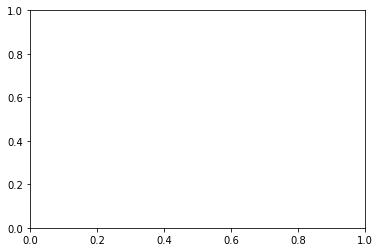

In [45]:
epoch_ticks = range(1, n_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

In [3]:
class text_ds(Dataset):
    def __init__(self, df):

        # Clean and tokenize
        # stop_words = set(stopwords.words('english'))
        # lemmatizer = WordNetLemmatizer()
        lemmatizer = WordNetLemmatizer()
        df['tokens'] = df.comment_text.apply(
            partial(
                tokenize,
                stop_words='english',
                
                lemmatizer=lemmatizer,
            ),
        )  
        
        all_tokens = [token for doc in list(df.tokens) for token in doc]
            
        # Build vocab
        vocab = sorted(set(
            token for doc in list(df.tokens) for token in doc
        ))
        self.token2idx = {token: idx for idx, token in enumerate(vocab)}
        self.idx2token = {idx: token for token, idx in self.token2idx.items()}
        
        # Convert tokens to indexes
        df['indexed_tokens'] = df.tokens.progress_apply(
            lambda doc: [self.token2idx[token] for token in doc],
        )
        
        # Build BoW vector
        # df['bow_vector'] = df.indexed_tokens.progress_apply(
        #     build_bow_vector, args=(self.idx2token,)
        # )
        
        # Build TF-IDF vector
        vectorizer = TfidfVectorizer(
            analyzer='word',
            tokenizer=lambda doc: doc,
            preprocessor=lambda doc: doc,
            token_pattern=None,
            max_features=10000
        )
        vectors = vectorizer.fit_transform(df.comment_text).toarray()
        df['tfidf_vector'] = [vector.tolist() for vector in vectors]
        
        self.text = df.comment_text.tolist()
        self.sequences = df.indexed_tokens.tolist()
        # self.bow_vector = df.bow_vector.tolist()
        self.tfidf_vector = df.tfidf_vector.tolist()
        self.targets = df.toxic.tolist()
    
    def __getitem__(self, i):
        return (
            self.sequences[i],
            # self.bow_vector[i],
            self.tfidf_vector[i],
            self.targets[i]
        )
    
    def __len__(self):
        return len(self.targets)

NameError: ignored

In [12]:
dataset = text_ds(df_classification)

100%|██████████| 159571/159571 [00:05<00:00, 31207.02it/s]


In [13]:
def split_train_valid_test(corpus, valid_ratio=0.1, test_ratio=0.1):
    """Split dataset into train, validation, and test."""
    test_length = int(len(corpus) * test_ratio)
    valid_length = int(len(corpus) * valid_ratio)
    train_length = len(corpus) - valid_length - test_length
    return random_split(
        corpus, lengths=[train_length, valid_length, test_length],
    )

In [14]:
train_dataset, valid_dataset, test_dataset = split_train_valid_test(
    dataset, valid_ratio=0.25, test_ratio=0.05)
len(train_dataset), len(valid_dataset), len(test_dataset)

(111701, 39892, 7978)

In [47]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(df_classification.comment_text)


TfidfVectorizer(max_features=10000, stop_words='english',
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

In [48]:
X = df_classification['comment_text']
y = df_classification['toxic']

In [49]:
x = word_vectorizer.transform(X)

In [ ]:
x = torch.from_numpy(x.todense())

In [ ]:
x

In [38]:
def prepare_data_class(X,y, batch_size):
    train_size = int(0.8 * X.shape[0])
    val_size = int(X.shape[0] - train_size)

    X = word_vectorizer.transform(X)
    y = y.to_numpy()

    X_tensor = torch.Tensor(X)
    y_tensor = torch.Tensor(y)

    dataset = TensorDataset(X_tensor, y_tensor)
    train_ds, val_ds = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_ds, batch_size=batch_size,
                                              shuffle=True)

    val_loader = DataLoader(val_ds, batch_size=batch_size,
                                             shuffle=False)
    return train_loader, val_loader

In [29]:
BATCH_SIZE = 528

def collate(batch):
    # seq = [item[0] for item in batch]
    tfidf = torch.Tensor([item[1] for item in batch])
    target = torch.LongTensor([item[2] for item in batch])
    return  tfidf, target

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, collate_fn=collate)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate)

In [34]:
class FeedfowardTextClassifier(nn.Module):
    def __init__(self, device, vocab_size, hidden1, hidden2, num_labels, batch_size):
        super(FeedfowardTextClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, num_labels)
    
    def forward(self, x):
        batch_size = len(x)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        # x = torch.FloatTensor(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))


In [19]:
# Define hidden layer size
HIDDEN1 = 100 #@param [10, 30, 50, 100, 200, 500] {allow-input: true}
HIDDEN2 = 50 #@param [10, 30, 50, 100, 200, 500] {allow-input: true}

In [35]:
tfidf_model = FeedfowardTextClassifier(
    vocab_size=len(dataset.token2idx),
    hidden1=HIDDEN1,
    hidden2=HIDDEN2,
    num_labels=2,
    device=device,
    batch_size=BATCH_SIZE,
)
tfidf_model

FeedfowardTextClassifier(
  (fc1): Linear(in_features=149833, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, tfidf_model.parameters()),
    lr=0.001,
)
# scheduler = CosineAnnealingLR(optimizer, 1)

In [27]:
# обучение
def fit_class(epochs, model, loss_func, opt, train_dl, valid_dl):
    train_losses = []
    train_acc = []
    val_losses = []
    valid_accuracies = []
    for epoch in range(epochs):
        model.train()
        loss_sum = 0
        squared_error = 0
        n = 0
        for xb, yb in (train_dl):
            xb= xb.to(device)
            yb = yb.to(device)
            probs = model(xb)
            loss = loss_func(model(xb), yb)
            loss_sum += loss.item()
            _, preds = torch.max(probs, axis=-1)

            correct += (probs == yb).sum().item()
            num += len(xb)
            
            loss.backward()
            opt.step()
            opt.zero_grad()
        train_acc.append(pow(squared_error / n,0.5))
        train_losses.append(loss_sum / len(train_dl))

        model.eval()
        loss_sum = 0
        squared_error = 0
        n = 0
        with torch.no_grad():
            for xb, yb in valid_dl:
                xb, yb = xb.to(device), yb.to(device)
                probs = model(xb)
                loss_sum += loss_func(probs, yb).item()
                _, preds = torch.max(probs, axis=-1)
                correct += (probs == yb).sum().item()
                num += len(xb)
                
        val_losses.append(loss_sum / len(valid_dl))
        valid_accuracies.append(pow(squared_error / n,0.5))
        
    return train_losses, train_acc,  val_losses, valid_accuracies

In [36]:
epochs = 3
train_losses, valid_losses = [], []
result = fit_class(epochs, tfidf_model, criterion, optimizer, *prepare_data_class())



RuntimeError: ignored

## 2.2 По необходимости проведите преодбработку/нормализацию данных

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_valid, Y_train, Y_valid= train_test_split(df_classification['comment_text'].tolist(),\
                                                      df_classification['toxic'].tolist(),\
                                                      test_size=0.2,\
                                                      random_state=0)

In [36]:
train_dat =list(zip(Y_train,X_train))
valid_dat =list(zip(Y_valid,X_valid))

In [35]:
from torchtext.data import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

In [11]:
tokenizer = get_tokenizer("basic_english")

In [37]:
tokenizer = get_tokenizer('basic_english')
train_iter = train_dat
def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

In [38]:
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x) 

## 2.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=логистическая регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [72]:
def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
         label_list.append(label_pipeline(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)

In [139]:
class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        # self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc1 = nn.Linear(vocab_size,64)
        self.fc2 = nn.Linear(64,16)
        self.fc3 = nn.Linear(16, num_class)
    #     self.init_weights()

    # def init_weights(self):
    #     initrange = 0.5
    #     self.embedding.weight.data.uniform_(-initrange, initrange)
    #     self.fc1.weight.data.uniform_(-initrange, initrange)
    #     self.fc1.bias.data.zero_()
    #     self.fc2.weight.data.uniform_(-initrange, initrange)
    #     self.fc2.bias.data.zero_()
    #     self.fc3.weight.data.uniform_(-initrange, initrange)
    #     self.fc3.bias.data.zero_()

    def forward(self, text, offsets):
        # embedded = self.embedding(text, offsets)
        x = F.relu(self.fc1(text))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [140]:
train_iter1 = train_dat
num_class = len(set([label for (label, text) in train_iter1]))
print(num_class)
vocab_size = len(vocab)
emsize = 128
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

2


In [112]:
import time

def train(train_loader, val_loader, epochs):
  train_loss, train_acc = [], []
  val_loss, val_acc = [], []
  for epoch in range(epochs):
      model.train()
      total_acc, total_count = 0, 0
      loss_sum = 0
      for idx,(label, text, offsets) in tqdm(enumerate(train_loader)):
          optimizer.zero_grad()
          predited_label = model(text, offsets)
          loss = criterion(predited_label, label)
          loss_sum += loss.item()
          loss.backward()
          # torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
          optimizer.step()


          total_acc += (predited_label.argmax(1) == label).sum().item()
          total_count += label.size(0)
            
          
      train_loss.append(loss_sum / len(train_loader))
      train_acc.append(total_acc / total_count)

      model.eval()
      total_acc, total_count = 0, 0
      loss_sum = 0
      with torch.no_grad():
          for idx, (label, text, offsets) in enumerate(val_loader):
              predited_label = model(text, offsets)
              loss = criterion(predited_label, label)
              loss_sum += loss.item()
              total_acc += (predited_label.argmax(1) == label).sum().item()
              total_count += label.size(0)

      val_loss.append(loss_sum / len(val_loader))
      val_acc.append(total_acc / total_count)

  return train_loss, train_acc, val_loss, val_acc

In [141]:
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset
# Hyperparameters
EPOCHS = 10 # epoch
LR =10  # learning rate
BATCH_SIZE = 64 # batch size for training

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None

train_iter2 = train_dat
valid_iter2= valid_dat




train_dataloader = DataLoader(train_iter2, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(valid_iter2, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)


In [142]:
info = train(train_dataloader, valid_dataloader,epochs=10)

0it [00:00, ?it/s]


RuntimeError: ignored

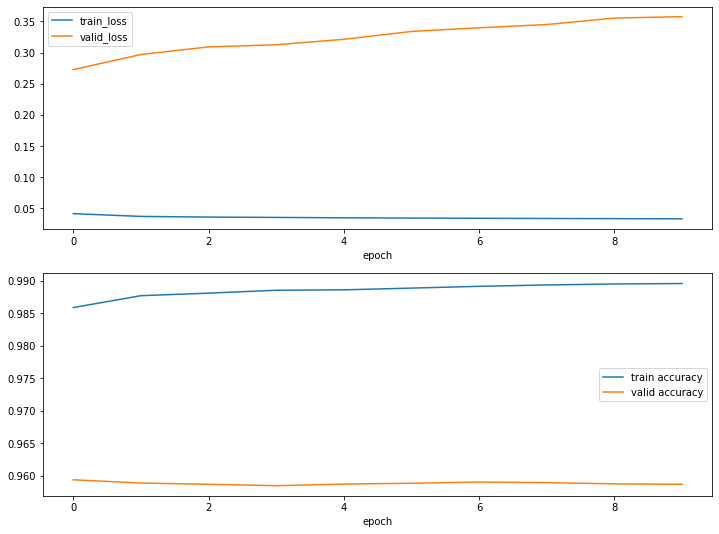

In [109]:
plot_trainig(*info)

## 2.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации на промежуточных слоях: sigmoid, tanh, ReLU, ELU. На выходном слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

## 2.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

## 2.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

## 2.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

## 2.8 Выводы

*Your beautiful thoughts:*

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from torch.utils.data import DataLoader
from torchtext.data.functional import to_map_style_dataset

vectorizer = CountVectorizer(vocabulary=vocab.get_itos(), tokenizer=tokenizer)

def vectorize_batch(batch):
    Y, X = list(zip(*batch))
    X = vectorizer.transform(X).todense()
    return torch.tensor(X, dtype=torch.float32), torch.tensor(Y) - 1 ## We have deducted 1 from

In [130]:
train_dataset, test_dataset  = train_dat, valid_dat
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

train_loader = DataLoader(train_dataset, batch_size=256, collate_fn=vectorize_batch)
test_loader  = DataLoader(test_dataset, batch_size=256, collate_fn=vectorize_batch)

In [143]:
class TextClassifier(nn.Module):
    def __init__(self):
        super(TextClassifier, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(len(vocab), 128),
            nn.ReLU(),

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64, 2),
            #nn.ReLU(),

            #nn.Linear(64, 4),
        )

    def forward(self, X_batch):
        return self.seq(X_batch)


In [133]:
text_classifier = TextClassifier()
for X, Y in train_loader:
    Y_preds = text_classifier(X)
    print(Y_preds.shape)
    break

torch.Size([256, 4])


In [134]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import gc

def CalcValLossAndAccuracy(model, loss_fn, val_loader):
    with torch.no_grad():
        Y_shuffled, Y_preds, losses = [],[],[]
        for X, Y in val_loader:
            preds = model(X)
            loss = loss_fn(preds, Y)
            losses.append(loss.item())

            Y_shuffled.append(Y)
            Y_preds.append(preds.argmax(dim=-1))

        Y_shuffled = torch.cat(Y_shuffled)
        Y_preds = torch.cat(Y_preds)

        print("Valid Loss : {:.3f}".format(torch.tensor(losses).mean()))
        print("Valid Acc  : {:.3f}".format(accuracy_score(Y_shuffled.detach().numpy(), Y_preds.detach().numpy())))


def TrainModel(model, loss_fn, optimizer, train_loader, val_loader, epochs=10):
    for i in range(1, epochs+1):
        losses = []
        for X, Y in tqdm(train_loader):
            Y_preds = model(X)

            loss = loss_fn(Y_preds, Y)
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print("Train Loss : {:.3f}".format(torch.tensor(losses).mean()))
        CalcValLossAndAccuracy(model, loss_fn, val_loader)

In [144]:
epochs = 3
learning_rate = 1e-4

loss_fn = torch.nn.CrossEntropyLoss()
text_classifier = TextClassifier()
optimizer = torch.optim.Adam(text_classifier.parameters(), lr=learning_rate)

TrainModel(text_classifier, loss_fn, optimizer, train_loader, test_loader, epochs)

  0%|          | 0/499 [00:00<?, ?it/s]


IndexError: ignored